In [1]:
import pandas as pd
import pubchempy as pcp
from collections import Counter

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

import numpy as np
from rdkit.Chem import AllChem
from rdkit import DataStructs
from molvs import standardize_smiles
import random 
import time
import networkx as nx
import csv
import math

import sys

import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse
import nvidia_smi

/data/conghao001/anaconda3/envs/gnndrug/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from utils_data import *
from utils_preproc import *

In [3]:
folder = "data/"  ## aka folder
root_folder = "root_folder/"
data_folder = "data/"

# Raw data

In [22]:
drug_list = pd.read_csv(data_folder + 'DrugList.csv')
drug_list

,drug_id,drug_name,synonyms,pathway_name,targets,pubchem
0,1559,Luminespib,"AUY922, VER-52296,NVP-AUY922, AUY",Protein stability and degradation,HSP90,10096043
1,1372,Trametinib,"GSK1120212, Mekinist",ERK MAPK signaling,"MEK1, MEK2",11707110
2,1909,Venetoclax,"ABT-199, Veneclexta, GDC-0199",Apoptosis regulation,BCL2,49846579
3,1017,Olaparib,"AZD2281, KU0059436, Lynparza",Genome integrity,"PARP1, PARP2",23725625
4,1021,Axitinib,"AG-13736, Inlyta",RTK signaling,"PDGFR, KIT, VEGFR",6450551
...,...,...,...,...,...,...
193,1441,AZD2014,SN1103949359,PI3K/MTOR signaling,"mTORC1, mTORC2",-
194,1709,CDK9_5038,"SN1047483750, CDK9_5038",Cell cycle,CDK9,-
195,1714,ERK_6604,"SN1047587618, ERK_6604",ERK MAPK signaling,"ERK1,ERK2",-
196,1401,AZD5438,SN1057898678,Cell cycle,CDK2,-


In [24]:
drug_list[drug_list['drug_id']==1617]

,drug_id,drug_name,synonyms,pathway_name,targets,pubchem
141,1617,AZD5582,"GTPL7710, AOB5560",Apoptosis regulation,"XIAP, cIAP",49847690


In [4]:
df0 = pd.read_csv(data_folder+'drug_smiles.csv')
df0

,drug_id,drug_name,synonyms,pathway_name,targets,pubchem,SMILES
0,1559,Luminespib,"AUY922, VER-52296,NVP-AUY922, AUY",Protein stability and degradation,HSP90,10096043,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1,1372,Trametinib,"GSK1120212, Mekinist",ERK MAPK signaling,"MEK1, MEK2",11707110,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...
2,1909,Venetoclax,"ABT-199, Veneclexta, GDC-0199",Apoptosis regulation,BCL2,49846579,CC1(CCC(=C(C1)C2=CC=C(C=C2)Cl)CN3CCN(CC3)C4=CC...
3,1017,Olaparib,"AZD2281, KU0059436, Lynparza",Genome integrity,"PARP1, PARP2",23725625,C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC...
4,1021,Axitinib,"AG-13736, Inlyta",RTK signaling,"PDGFR, KIT, VEGFR",6450551,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...
...,...,...,...,...,...,...,...
164,1928,I-BRD9,"GSK602, GSK 602, GSK-602",Chromatin other,BRD9,91668541,CCN1C=C(C2=C(C1=O)C=C(S2)C(=NC3CCS(=O)(=O)CC3)...
165,1931,MIRA-1,"MIRA 1, MIRA1, NSC19630, NSC-19630, NSC 19630",p53 pathway,TP53,227681,CCC(=O)OCN1C(=O)C=CC1=O
166,2096,VX-11e,"VX11e, VX11e",ERK MAPK signaling,ERK2,11634725,CC1=CN=C(N=C1C2=CNC(=C2)C(=O)NC(CO)C3=CC(=CC=C...
167,2107,LJI308,-,PI3K/MTOR signaling,"RSK2, RSK1, RSK3",118704762,C1COCCN1C2=CC=C(C=C2)C3=C(C=NC=C3)C4=CC(=C(C(=...


In [19]:
drug_list1 = drug_list.merge(df0, left_on='drug_id', right_on='drug_id')
drug_list1 = drug_list1.set_index('drug_id')
drug_list1

,drug_name,synonyms,pathway_name,targets,pubchem,SMILES
drug_id,,,,,,
1559,Luminespib,"AUY922, VER-52296,NVP-AUY922, AUY",Protein stability and degradation,HSP90,10096043,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1372,Trametinib,"GSK1120212, Mekinist",ERK MAPK signaling,"MEK1, MEK2",11707110,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...
1909,Venetoclax,"ABT-199, Veneclexta, GDC-0199",Apoptosis regulation,BCL2,49846579,CC1(CCC(=C(C1)C2=CC=C(C=C2)Cl)CN3CCN(CC3)C4=CC...
1017,Olaparib,"AZD2281, KU0059436, Lynparza",Genome integrity,"PARP1, PARP2",23725625,C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC...
1021,Axitinib,"AG-13736, Inlyta",RTK signaling,"PDGFR, KIT, VEGFR",6450551,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...
...,...,...,...,...,...,...
1928,I-BRD9,"GSK602, GSK 602, GSK-602",Chromatin other,BRD9,91668541,CCN1C=C(C2=C(C1=O)C=C(S2)C(=NC3CCS(=O)(=O)CC3)...
1931,MIRA-1,"MIRA 1, MIRA1, NSC19630, NSC-19630, NSC 19630",p53 pathway,TP53,227681,CCC(=O)OCN1C(=O)C=CC1=O
2096,VX-11e,"VX11e, VX11e",ERK MAPK signaling,ERK2,11634725,CC1=CN=C(N=C1C2=CNC(=C2)C(=O)NC(CO)C3=CC(=CC=C...


In [20]:
drug_list1.to_csv(data_folder + 'drug_smiles.csv')

In [9]:
reader = csv.reader(open(data_folder + "drug_smiles.csv"))    ## From csv
next(reader, None) 
for cnt, item in enumerate(reader):                       ## From csv
                                                            ## From df3
    print(item)
    print(item[0])

['1559', 'CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=CC=C(C=C3)CN4CCOCC4']
1559
['1058', 'CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=C5C=NNC5=CC=C4)N6CCOCC6']
1058
['1088', 'CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=C1C=C(C=C5)OC(=O)N6CCC(CC6)N7CCCCC7']
1088
['1549', 'CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4=C(C(=CC=C4)Cl)F)OC']
1549
['1073', 'C1=C(C(=O)NC(=O)N1)F']
1073
['1050', 'COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=C(C=C3)NC(=O)C4=CC=CC=C4)OCCCN5CCOCC5']
1050
['1086', 'CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C']
1086
['1129', 'CCC1=CN=CN=C1N2CCN(CC2)CC3=NC4=C(N3)C=C(C=C4)C(F)(F)F']
1129
['1089', 'C1CCC(C(C1)N)N.C(=O)(C(=O)O)O.[Pt]']
1089
['1194', 'CC1=NC(=CC=C1)C2=C(N=C(N2)C(C)(C)C)C3=CC4=C(C=C3)OCO4']
1194
['1940', 'COC1=CC=C(C=C1)N2C(=NN=C2SCCCN3C(=O)C4=CC=CC5=C4C(=CC=C5)C3=O)C6=CC=NC=C6']
1940
['2043', 'CC(=CC(=O)NC1=CC=CC=C1C(=O)O)C2=CC3=CC=CC=C3C=C2']
2043
['2045', 'CC(C1=C(N=C2C=C(C=CC2=C1)F)C3=CC=CC=N3)NC4=NC=NC5=C4NC=N5']
2045
['1084',

In [7]:
df1 = pd.read_csv(data_folder + 'PANCANCER_IC.csv')
df1

,Drug name,Drug Id,Cell line name,Cosmic sample Id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version
0,Erlotinib,1,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,112389,2.436586,0.982484,2.0,0.021894,-0.013193,17
1,Erlotinib,1,ES3,684055,UNCLASSIFIED,bone,ewings_sarcoma,46076,3.342826,0.984986,2.0,0.030357,0.777474,17
2,Erlotinib,1,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,46573,3.571787,0.982939,2.0,0.031807,0.977236,17
3,Erlotinib,1,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,47103,3.185231,0.984292,2.0,0.094084,0.639977,17
4,Erlotinib,1,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,49007,2.462555,0.946649,2.0,0.087727,0.009464,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224505,Pevonedistat,1529,SNU-407,1660034,COREAD,digestive_system,large_intestine,199227,-0.278601,0.827363,1.0,0.051694,-0.318022,17
224506,Pevonedistat,1529,SNU-61,1660035,COREAD,digestive_system,large_intestine,199956,3.013436,0.976436,1.0,0.040406,1.846470,17
224507,Pevonedistat,1529,SNU-81,1660036,COREAD,digestive_system,large_intestine,200136,0.577129,0.879707,1.0,0.098300,0.244615,17
224508,Pevonedistat,1529,SNU-C5,1674021,COREAD,digestive_system,large_intestine,200824,-0.452981,0.817504,1.0,0.038303,-0.432675,17


In [21]:
df1.rename(columns = {'Drug name':'drug_name'}, inplace = True)
df1.rename(columns = {'Drug Id':'drug_id'}, inplace = True)
df1

NameError: name 'df1' is not defined

In [4]:
df2 = pd.read_csv(data_folder+'drugs_smile.csv', sep='\t')
df2

,drug_id,SMILES
0,1559,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1,1058,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2,1088,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3,1549,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4,1073,C1=C(C(=O)NC(=O)N1)F
...,...,...
164,1629,CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...
165,1799,C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...
166,1835,CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...
167,1908,CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...


In [7]:
df2

In [9]:
df3 = pd.merge(df1, df0, how ='inner', on =['drug_id'])
df3

,drug_name,drug_id,Cell line name,Cosmic sample Id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version,SMILES
0,Camptothecin,1003,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,112557,-4.527144,0.591510,0.1,0.136515,-0.260926,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1,Camptothecin,1003,PFSK-1,683667,MB,nervous_system,medulloblastoma,173574,-4.461084,0.594578,0.1,0.166731,-0.224028,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2,Camptothecin,1003,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,46741,-6.615419,0.280020,0.1,0.106731,-1.427355,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3,Camptothecin,1003,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,47271,-7.402832,0.171753,0.1,0.090695,-1.867173,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4,Camptothecin,1003,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,49175,-6.048187,0.364565,0.1,0.137434,-1.110521,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37379,Pevonedistat,1529,SNU-407,1660034,COREAD,digestive_system,large_intestine,199227,-0.278601,0.827363,1.0,0.051694,-0.318022,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
37380,Pevonedistat,1529,SNU-61,1660035,COREAD,digestive_system,large_intestine,199956,3.013436,0.976436,1.0,0.040406,1.846470,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
37381,Pevonedistat,1529,SNU-81,1660036,COREAD,digestive_system,large_intestine,200136,0.577129,0.879707,1.0,0.098300,0.244615,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
37382,Pevonedistat,1529,SNU-C5,1674021,COREAD,digestive_system,large_intestine,200824,-0.452981,0.817504,1.0,0.038303,-0.432675,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...


In [10]:
df3.rename(columns = {'Cosmic sample Id':'cosmic_sample_id'}, inplace = True)
df3

,drug_name,drug_id,Cell line name,cosmic_sample_id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version,SMILES
0,Camptothecin,1003,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,112557,-4.527144,0.591510,0.1,0.136515,-0.260926,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1,Camptothecin,1003,PFSK-1,683667,MB,nervous_system,medulloblastoma,173574,-4.461084,0.594578,0.1,0.166731,-0.224028,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2,Camptothecin,1003,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,46741,-6.615419,0.280020,0.1,0.106731,-1.427355,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3,Camptothecin,1003,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,47271,-7.402832,0.171753,0.1,0.090695,-1.867173,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4,Camptothecin,1003,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,49175,-6.048187,0.364565,0.1,0.137434,-1.110521,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37379,Pevonedistat,1529,SNU-407,1660034,COREAD,digestive_system,large_intestine,199227,-0.278601,0.827363,1.0,0.051694,-0.318022,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
37380,Pevonedistat,1529,SNU-61,1660035,COREAD,digestive_system,large_intestine,199956,3.013436,0.976436,1.0,0.040406,1.846470,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
37381,Pevonedistat,1529,SNU-81,1660036,COREAD,digestive_system,large_intestine,200136,0.577129,0.879707,1.0,0.098300,0.244615,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
37382,Pevonedistat,1529,SNU-C5,1674021,COREAD,digestive_system,large_intestine,200824,-0.452981,0.817504,1.0,0.038303,-0.432675,17,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...


In [11]:
# cannot be loaded with pandas, since there are multiple values in the last column (using the same symbol ',' with delimiter)
df4 = pd.read_csv('data/PANCANCER_Genetic_feature.csv')
df4

ParserError: Error tokenizing data. C error: Expected 9 fields in line 378, saw 17


In [9]:
do_mol_ecfp = False
fpl = None
do_edge_features = True
# do_atom_ecfp = False
do_atom_ecfp = True
ecfp_radius = 3
use_radius = None

drug_dict_X, drug_smile_X, smile_graph_X = load_drug_smile_X(do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)

name = Cisplatin, smile = N.N.[Cl-].[Cl-].[Pt+2]


In [10]:
xd_X, xc_X, y_X, dgl, cosl = save_mix_drug_cell_matrix_X(do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)

name = Cisplatin, smile = N.N.[Cl-].[Cl-].[Pt+2]
preparing  GDSC_train.pt in pytorch format!


In [13]:
print(xd_X.shape)
print(xc_X.shape)
print(y_X.shape)

(48273,)
(48273, 735)
(48273,)


In [ ]:
xc_X

In [9]:
drug_dict_X

{'Luminespib': 0,
 'Trametinib': 1,
 'Venetoclax': 2,
 'Olaparib': 3,
 'Axitinib': 4,
 'Rapamycin': 5,
 'PRIMA-1MET': 6,
 'Talazoparib': 7,
 'CZC24832': 8,
 'PFI3': 9,
 'Wnt-C59': 10,
 'OTX015': 11,
 'GSK343': 12,
 'AGI-6780': 13,
 'Fludarabine': 14,
 'MN-64': 15,
 'AGI-5198': 16,
 'AZD3759': 17,
 'NVP-ADW742': 18,
 'P22077': 19,
 'WEHI-539': 20,
 'Foretinib': 21,
 'Uprosertib': 22,
 'Crizotinib': 23,
 'OSI-027': 24,
 'Vorinostat': 25,
 'Temozolomide': 26,
 'Docetaxel': 27,
 'ZM447439': 28,
 'AZD8055': 29,
 'Vinorelbine': 30,
 'LCL161': 31,
 'Ibrutinib': 32,
 'Acetalax': 33,
 'Carmustine': 34,
 'Vincristine': 35,
 'Podophyllotoxin bromide': 36,
 'Buparlisib': 37,
 'Afuresertib': 38,
 'Osimertinib': 39,
 'Savolitinib': 40,
 'Pyridostatin': 41,
 'Ulixertinib': 42,
 'Afatinib': 43,
 'Taselisib': 44,
 'Sapitinib': 45,
 'Camptothecin': 46,
 'SB216763': 47,
 'NU7441': 48,
 'Tozasertib': 49,
 '5-Fluorouracil': 50,
 'BMS-754807': 51,
 'Niraparib': 52,
 'Daporinad': 53,
 'BMS-345541': 54,
 'XAV

In [8]:
len(smile_graph_X)

164

In [4]:
from utils import *
from torch_geometric.loader import DataLoader

In [5]:
processed_data_file_test = 'root_folder/root_003/processed/GDSC_test_mix.pt'
branch_folder = "root_folder/root_003"
dataset = 'GDSC'
test_data = TestbedDataset(root=branch_folder, dataset=dataset+'_test_mix')

Pre-processed data found: root_folder/root_003/processed/GDSC_test_mix.pt, loading ...


In [6]:
test_batch = 1
test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=True)


In [8]:
stop=0
for batch_idx, data in enumerate(test_loader):
    if stop>10:
        break
    print(batch_idx)
    x, edge_index, batch, edge_feat = data.x, data.edge_index, data.batch, data.edge_features
    print(x.shape)
    print(edge_index.shape)
    print(batch)
    print(edge_feat.shape)
    drug_name = data.drug_name
    cell_line_name = data.cell_line_name
    print(drug_name)
    print(cell_line_name)
    stop += 1

0
torch.Size([30, 192])
torch.Size([2, 70])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])
torch.Size([70, 4])
['NU7441']
['1240158']
1
torch.Size([38, 192])
torch.Size([2, 80])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([80, 4])
['Paclitaxel']
['906832']
2
torch.Size([28, 192])
torch.Size([2, 58])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
torch.Size([58, 4])
['BMS-536924']
['907270']
3
torch.Size([59, 192])
torch.Size([2, 134])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([134, 4])
['Vinblastine']
['1298358']
4
torch.Size([59, 192])
torch.Size([2, 134])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [4]:
processed_data_file_train = 'root_folder/root_001/processed/GDSC_train_mix.pt'
branch_folder = "root_folder/root_001"
dataset = 'GDSC'
train_data = TestbedDataset(root=branch_folder, dataset=dataset+'_train_mix')

Pre-processed data found: root_folder/root_001/processed/GDSC_train_mix.pt, loading ...


In [5]:
train_data

TestbedDataset(38618)

In [6]:
train_batch = 1024
train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
train_loader

In [12]:
for batch_idx, data in enumerate(train_loader):
    print(batch_idx)
    x, edge_index, batch, edge_feat = data.x, data.edge_index, data.batch, data.edge_features
    print(x.shape)
    print(edge_index.shape)
    print(batch)
    print(edge_feat.shape)

0
torch.Size([33120, 192])
torch.Size([2, 73018])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([73018, 4])
1
torch.Size([32720, 192])
torch.Size([2, 72156])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([72156, 4])
2
torch.Size([32531, 192])
torch.Size([2, 71746])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([71746, 4])
3
torch.Size([32807, 192])
torch.Size([2, 72434])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([72434, 4])
4
torch.Size([32875, 192])
torch.Size([2, 72524])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([72524, 4])
5
torch.Size([32252, 192])
torch.Size([2, 71192])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([71192, 4])
6
torch.Size([32928, 192])
torch.Size([2, 72586])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([72586, 4])
7
torch.Size([32772, 192])
torch.Size([2, 72300])
tensor([   0,    0,    0,  ..., 1023, 1023, 1023])
torch.Size([72300, 4])
8
torch.

In [18]:
for i in range(df2.shape[0]):
#     print(df2['drug_id'].iloc[i])
    smile = df2['SMILES'].iloc[i]
    mol = Chem.MolFromSmiles(smile)
    n_atom = mol.GetNumAtoms()
    if n_atom == 74:
        print(df2['drug_id'].iloc[i])
        print(n_atom)
        print(i)

1617
74
118


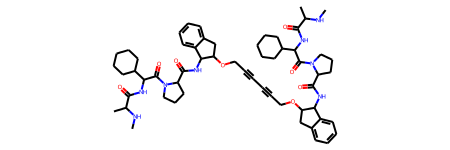

In [34]:
smile = df2['SMILES'].iloc[118]
mol = Chem.MolFromSmiles(smile)
# for i, atom in enumerate(mol.GetAtoms()):
#     # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
#     atom.SetProp("molAtomMapNumber", str(atom.GetIdx()+1))

mol


In [35]:
Chem.Draw.MolToImageFile(mol, 'AZD5582.png', size = (1000, 1000))

In [26]:
drug_path = 'root_folder/root_002/Saliency/Drug/GCNNet/9.npy'
drug_saliency = np.load(drug_path)
# drug_saliency.shape
drug_sal = np.sum(drug_saliency, axis=1)
# drug_sal.shape
norm = np.linalg.norm(drug_sal)
drug_sal1 = drug_sal / norm
drug_sal1

array([4.27606805e-01, 4.38763944e-01, 2.84968292e-01, 1.51293779e-01,
       1.04202280e-01, 3.85012023e-02, 1.68057865e-03, 6.00108280e-04,
       2.99701754e-04, 2.41986095e-04, 2.99701754e-04, 6.00108280e-04,
       1.28852268e-02, 1.43156552e-02, 5.62812982e-03, 2.19017195e-03,
       1.29630563e-03, 1.87383191e-03, 4.65522894e-03, 6.23742359e-03,
       6.05792430e-03, 4.25704308e-03, 1.67829884e-03, 5.41005031e-04,
       1.06532672e-04, 5.52015205e-05, 1.55423054e-05, 0.00000000e+00,
       0.00000000e+00, 1.21479935e-05, 5.10462239e-04, 1.11881930e-04,
       5.72510678e-05, 2.08081878e-05, 0.00000000e+00, 0.00000000e+00,
       2.15267019e-05, 5.91717060e-05, 1.17361560e-04, 3.52370754e-04,
       1.12080528e-04, 5.91121223e-05, 1.60943719e-05, 0.00000000e+00,
       0.00000000e+00, 1.88262885e-05, 3.34652725e-04, 1.11845029e-03,
       2.90016401e-03, 4.36616383e-03, 4.19298409e-03, 3.95241046e-03,
       1.56242051e-03, 1.25277108e-03, 2.53262507e-03, 6.47022371e-03,
      

In [ ]:
drug_sal2 = np.round(drug_sal1, 2)
drug_sal2

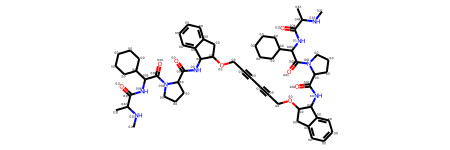

In [29]:
smile = df2['SMILES'].iloc[118]
mol = Chem.MolFromSmiles(smile)
for i, atom in enumerate(mol.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom.SetProp("atomNote", str(drug_sal2[i]))

mol

In [33]:
Chem.Draw.MolToImageFile(mol, 'AZD5582_saliency.png', size = (1000, 1000))

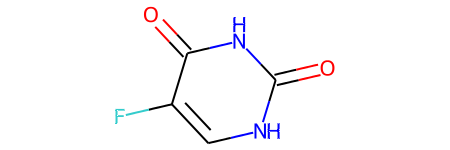

In [36]:
mol2 = Chem.MolFromSmiles('C1=C(C(=O)NC(=O)N1)F')
mol2

# Processed data

In [4]:
import torch
from utils_data import *

In [5]:
torch.__version__

'1.11.0'

In [6]:
# import torch_geometric as pyg
from torch_geometric.loader import DataLoader     # for pyg >= 2.0

In [7]:
branch_folder = "root_folder/root_020"
dataset = 'GDSC'
data = TestbedDataset(root=branch_folder, dataset=dataset+'_train_mix')

Pre-processed data found: root_folder/root_020/processed/GDSC_train_mix.pt, loading ...


In [8]:
bs = 1
data_loader = DataLoader(data, batch_size=bs, shuffle=False)

In [8]:
i = 0
for data in data_loader:
    i += 1
#     print(data)
    print(data.x.shape)
    print(data.smiles)
    print(data.drug_name)
    if i >= 5:
        break

torch.Size([39, 334])
['C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4CCC(CC4)N5CCCC5)NC6=CC=CC=C6']
['UNC1215']
torch.Size([24, 334])
['C1=CC2=C(C=CC(=C2)C=C3C(=O)N=C(S3)NCC4=CC=CS4)N=C1']
['RO-3306']
torch.Size([31, 334])
['CC1=C(C(CC(=O)N1)C2=CC=C(C=C2)C(F)(F)F)C(=O)NC3=C(C=C4C(=C3)C=NN4)F']
['GSK429286A']
torch.Size([39, 334])
['CC(C)S(=O)(=O)C1=CC=CC=C1NC2=NC(=NC(=C2Cl)N)NC3=C(C=C(C=C3)N4CCC(CC4)C(=O)N)OC']
['HG-5-88-01']
torch.Size([29, 334])
['CCC1=C2C=C(C=CC2=NC3=C1CN4C3=CC5=C(C4=O)COC(=O)C5(CC)O)O']
['SN-38']


In [9]:
one = next(iter(data_loader))
print(one)

DataBatch(x=[23, 334], edge_index=[2, 52], y=[1], edge_features=[52, 4], smiles=[1], drug_name=[1], cell_line_name=[1], target=[1, 1, 1000], c_size=[1], batch=[23], ptr=[2])


In [10]:
one.target

tensor([[[ 1.8400,  4.5053,  1.6415,  1.6599,  0.9336,  0.8639,  1.2987,
           2.6736,  4.7431,  0.3561,  0.8156,  1.8992,  8.5190,  0.2630,
           6.5866,  0.3103,  1.2141,  7.9430,  0.4005,  0.7908,  0.6415,
           7.3327,  0.3561,  0.3561,  0.4114,  0.7570,  0.2869,  5.9669,
           0.3896,  1.2869,  1.1890,  0.5160,  0.4114,  1.7908,  0.1375,
           0.2630,  5.7101,  0.3334,  7.6658,  1.1763,  2.3785,  0.8400,
           0.3674,  2.3951,  0.5361,  2.9928,  3.1985,  0.7570,  0.3448,
           6.3750,  0.2141,  0.5160,  0.1506,  0.5656,  0.2016,  0.3561,
           8.3909,  9.7456,  0.2265,  8.3406, 10.0388,  0.3785,  8.4763,
           0.2869,  0.2750,  0.2510,  1.8400,  0.3103,  6.4867,  5.9971,
           1.5008,  9.6935,  0.1375,  5.6392,  0.3103,  0.1890,  0.2630,
           0.2016,  7.3182,  0.2750,  0.2016,  0.2016,  0.4436,  0.3561,
           0.1243,  0.6960,  1.0976,  0.7312,  5.7068,  0.4222,  6.8273,
           8.6753,  0.5059,  0.0976,  0.4957,  0.13

In [19]:
one.x.dtype

torch.float32

In [24]:
one.edge_index

tensor([[    0,     0,     1,  ..., 33224, 33225, 33226],
        [    1,     5,     0,  ..., 33226, 33224, 33224]])

In [21]:
one.edge_index[0].dtype

torch.int64

In [22]:
edge_index = one.edge_index
new_edge_index = edge_index.type(torch.LongTensor)

In [23]:
new_edge_index.dtype

torch.int64

In [14]:
if new_edge_index.dtype == torch.LongTensor:
    print('t')

In [15]:
one.x[0]

tensor([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.])